ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **21Sep20**

# 06. Computational Linear Algebra Fundamentals
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Objectives](#obj)
* [Theory](#theory)
* [Matrix-vector and matrix-matrix product operations](#product)
 + [Vector inner product](#inner)
 + [Matrix-vector product](#matvec)
 + [Matrix-matrix product](#matmat)
 + [Vector outer product](#outer)
* [NumPy and SciPy Linear Algebra](#pylinalg)
 + [Matrix solve](#pysolve)
 + [Matrix rank](#pyrank)
 + [Matrix inverse](#pyinv)
 + [$\Lmtrx$ forward solve](#pyl)
 + [$\Umtrx$ backward solve](#pyu)
 + [Verification of solver accuracy](#accuracy)
 + [$\Amtrx = \Pmtrx\,\Lmtrx\,\Umtrx$ factorization](#pyplu)
* [This Course Linear Algebra](#courselinalg)
 + [$\Lmtrx$ forward solve](#l)
 + [$\Umtrx$ backward solve](#u)
 + [$\Amtrx = \Lmtrx\,\Umtrx$ factorization](#lu)
 + [$\Pmtrx\,\Amtrx = \Lmtrx\,\Umtrx$ factorization](#plu)
 + [$\Pmtrx\,\Amtrx\,\Qmtrx = \Lmtrx\,\Umtrx$ factorization](#pqlu)
 + [Rank of $\Amtrx$](#rank)
---

## [Objectives](#toc)<a id="obj"></a>

 + Introduce the elements of computational linear algebra needed in this course to analyse and solve system of linear algebraic equations.
 + Implement a direct method of solution of linear algebraic equations (also known as matrix factorization).

## [Theory](#toc)<a id="theory"></a>
The course notes (OneNote [ChEn-3170-linalg](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/ElnkSCbFAJFJn2BnAc3XSnkBsJIowFKHoeXnc-6jmmhPXQ?e=dHRfb7) cover basic elements of linear system of algebraic equations as applied to computational stoichiometry. Particular attention is given to conditions for the existance and uniqueness of solutions of general algebraic systems.

Basic theoretical aspects of solving for $\overset{(n)}{\xvec}$ in the matrix equation $\overset{(m\times n)}{\Amtrx}\,\overset{(n)}{\xvec} = \overset{(m)}{\bvec}$ are covered. $\overset{(m\times n)}{\Amtrx}$ is a matrix, $\overset{(m)}{\bvec}$ and $\overset{(n)}{\xvec}$ are vectors where $m$ indicates the number of rows (or equations) and $n$ number of columns (or unknowns).

## [Matrix-vector and matrix-matrix product operations](#toc)<a id="product"></a>
The following operations between vectors and matrices are obtained directly from the buil-in functions in the `numpy` package.

In [1]:
'''Import the NumPy package as usual'''

import numpy as np

#### [Vector inner product](#toc)<a id="inner"></a>

Inner product of two vectors: $\avec \cdot \bvec$.

In [2]:
'''Vector inner product or dot product of vectors'''

a_vec = np.array( np.random.random(3) )
b_vec = np.array( np.random.random(3) )

np.set_printoptions(precision=3, threshold=20, edgeitems=12, linewidth=100)

a_vec_dot_b_vec = np.dot( a_vec, b_vec ) # clear linear algebra operation
print('a.b =', a_vec_dot_b_vec)

a_vec_x_b_vec = a_vec @ b_vec   # consistent linear algebra multiplication
print('a@b =', a_vec_x_b_vec )

a.b = 0.41080763169640266
a@b = 0.41080763169640266


In [3]:
print( 'a.b = %10.4e'%a_vec_dot_b_vec ) # formatting with scientific notation

a.b = 4.1081e-01


#### [Matrix-vector product](#toc)<a id="matvec"></a>

Matrix vector product: $\Amtrx\,\bvec$.

In [4]:
'''Matrix-vector product'''

a_mtrx = np.array( [ [ 2.,  1., 1.],   # per course notes (NB 03/04)
                     [ 4., -6., 0.],
                     [-2.,  7., 2.] 
                   ] )

b_vec = np.array( [5., -2., 9.] )       # per course notes

a_mtrx_x_b_vec = a_mtrx @ b_vec # linear algebra matrix-vector product

print('A b =', a_mtrx_x_b_vec)

A b = [17. 32. -6.]


**$\Rightarrow$ This:** `a_mtrx * b_vec` is a valid operation but <span style="color:red">**it is not**</span> a matrix-vector product of linear algebra!

Matrix-vector product: $\Imtrx\,\bvec = \bvec$. Note: $\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} \, \begin{pmatrix} b_1\\b_2\\b_3 \end{pmatrix} = \begin{pmatrix} b_1\\b_2\\b_3 \end{pmatrix} $.

In [5]:
'''Identity-matrix vector product'''

i_mtrx = np.eye(3)

i_mtrx_x_b_vec = i_mtrx @ b_vec # linear algebra matrix-vector product

print('b   =', b_vec)
print('I b =', i_mtrx_x_b_vec)

b   = [ 5. -2.  9.]
I b = [ 5. -2.  9.]


Matrix-matrix product: $\Imtrx\,\Amtrx = \Amtrx$. Note: $\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} \, 
\begin{pmatrix} 
A_{1,1} & A_{1,2} & A_{1,3} \\
A_{2,1} & A_{2,2} & A_{2,3} \\
A_{3,1} & A_{3,2} & A_{3,3}
\end{pmatrix} = 
\begin{pmatrix} 
A_{1,1} & A_{1,2} & A_{1,3} \\
A_{2,1} & A_{2,2} & A_{2,3} \\
A_{3,1} & A_{3,2} & A_{3,3}
\end{pmatrix}
$.

In [6]:
'''Matrix-matrix product IA = A'''

i_mtrx_x_a_mtrx = i_mtrx @ a_mtrx   # linear algebra matrix-matrix product

print('I x A =\n', i_mtrx_x_a_mtrx)
print('A     =\n', a_mtrx)

I x A =
 [[ 2.  1.  1.]
 [ 4. -6.  0.]
 [-2.  7.  2.]]
A     =
 [[ 2.  1.  1.]
 [ 4. -6.  0.]
 [-2.  7.  2.]]


#### [Matrix-matrix product](#toc)<a id="matmat"></a>

Matrix-matrix product: $\Amtrx\,\Bmtrx = \Cmtrx$. Note: 
$\begin{pmatrix}
A_{1,1} & A_{1,2} & A_{1,3} \\
A_{2,1} & A_{2,2} & A_{2,3} \\
A_{3,1} & A_{3,2} & A_{3,3}
\end{pmatrix} \, 
\begin{pmatrix} 
B_{1,1} & B_{1,2} & B_{1,3} \\
B_{2,1} & B_{2,2} & B_{2,3} \\
B_{3,1} & B_{3,2} & B_{3,3}
\end{pmatrix} = 
\begin{pmatrix} 
C_{1,1} & C_{1,2} & C_{1,3} \\
C_{2,1} & C_{2,2} & C_{2,3} \\
C_{3,1} & C_{3,2} & C_{3,3}
\end{pmatrix}
$ where each $C_{i,j}$ is a vector product of the $i$th row of $\Amtrx$ and the $j$th column of $\Bmtrx$, *i.e.* 
$C_{i,j} = \sum\limits_{k=1}^3 A_{i,k}\, B_{k,j}$.

In [7]:
'''Matrix-matrix product AB = C'''

b_mtrx = np.array( [ [ 5. ,  5. ,  5.],
                     [-2. , -2. , -2.],
                     [ 9. ,  9. ,  9.]  ]
                 )

c_mtrx = a_mtrx @ b_mtrx   # linear algebra matrix-matrix product

print('A =\n', a_mtrx)
print('B =\n', b_mtrx)
print('A B = C =\n', c_mtrx)

A =
 [[ 2.  1.  1.]
 [ 4. -6.  0.]
 [-2.  7.  2.]]
B =
 [[ 5.  5.  5.]
 [-2. -2. -2.]
 [ 9.  9.  9.]]
A B = C =
 [[17. 17. 17.]
 [32. 32. 32.]
 [-6. -6. -6.]]


<div class="alert alert-block alert-danger">
The matrix-matrix product: $\Bmtrx\,\Amtrx = \Dmtrx \ne \Cmtrx$, does not commute in general. Note 
$D_{i,j} = \sum\limits_{k=1}^3 B_{i,k}\, A_{k,j}$.
</div>

In [8]:
'''Matrix-matrix product BA = D'''

d_mtrx = b_mtrx @ a_mtrx   # linear algebra matrix-matrix product

print('A =\n', a_mtrx)
print('B =\n', b_mtrx)
print('B A = D =\n', d_mtrx)

A =
 [[ 2.  1.  1.]
 [ 4. -6.  0.]
 [-2.  7.  2.]]
B =
 [[ 5.  5.  5.]
 [-2. -2. -2.]
 [ 9.  9.  9.]]
B A = D =
 [[20. 10. 15.]
 [-8. -4. -6.]
 [36. 18. 27.]]


#### [Vector outer product](#toc)<a id="outer"></a>

In [9]:
'''Vector-vector outer product'''

a_vec = np.random.random(4)
b_vec = np.random.random(5)

mtrx = np.outer(a_vec, b_vec)

print('a outer b =\n', mtrx)
print('shape =',mtrx.shape)

a outer b =
 [[0.021 0.117 0.348 0.406 0.032]
 [0.031 0.172 0.513 0.599 0.047]
 [0.012 0.064 0.192 0.224 0.018]
 [0.017 0.095 0.282 0.33  0.026]]
shape = (4, 5)


In [10]:
'''Vector-vector outer product'''

mtrx = np.outer(b_vec, a_vec)

print('b outer a =\n', mtrx)
print('shape =',mtrx.shape)

b outer a =
 [[0.021 0.031 0.012 0.017]
 [0.117 0.172 0.064 0.095]
 [0.348 0.513 0.192 0.282]
 [0.406 0.599 0.224 0.33 ]
 [0.032 0.047 0.018 0.026]]
shape = (5, 4)


## [NumPy and SciPy Linear Algebra](#toc)<a id="pylinalg"></a>
[NumPy](http://www.numpy.org/) has extensive support for [linear algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html?highlight=linear%20algebra) arrays. We collect here the relevant operations for this course.
However additional resources are instead added to [SciPy](https://docs.scipy.org/doc/scipy-1.1.0/reference/) for general scientific computing including [linear algebra](https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/linalg.html).

Linear algebra operations are obtained from the `linalg` sub-package of the `numpy` package, and the `linalg` sub-package of `scipy`.

In [11]:
'''Import the NumPy linear algebra sub-package as usual'''

#import numpy.linalg as linalg
#from numpy import linalg       # often used alternative
'''or leave it commented since the usage of np.linalg is self-documenting'''

'or leave it commented since the usage of np.linalg is self-documenting'

The 2-norm or norm (magnitude) of a vector $\bvec$ is indicated as $\norm{\bvec}$ and computed as follows:

In [12]:
'''Vector norm (or magnitude)'''

norm_b_vec = np.linalg.norm( b_vec ) # default norm is the 2-norm 
print('||b|| =', norm_b_vec)      # same as magnitude

||b|| = 1.3148583423071523


### [Matrix solve](#toc)<a id="pysolve"></a>

*Solve*<a id="solve"></a> for $\xvec$ in the matrix equation $\Amtrx\,\xvec = \bvec$, where $\Amtrx = 
\begin{pmatrix}
2 & 1 & 1 \\
4 & -6 & 0 \\
-2 & 7 & 2
\end{pmatrix}
$
and $\bvec = \begin{pmatrix} 5\\ -2\\ 9 \end{pmatrix}$.

In [13]:
'''Matrix solver (this is short for solution of a linear algebraic system of equations)'''

a_mtrx = np.array( [ [ 2.,  1., 1.],   # per course notes (NB 03/04)
                     [ 4., -6., 0.],
                     [-2.,  7., 2.] 
                   ] )

b_vec = np.array( [5., -2., 9.] ) 

x_vec = np.linalg.solve( a_mtrx, b_vec ) # solve linear system for A, b; per course notes 04

print('solution x =', x_vec)

solution x = [1. 1. 2.]


The residual vector defined as $\rvec = \bvec - \Amtrx\,\xvec$ is of importance. So is its norm $\norm{\rvec}$.

In [14]:
'''Verify the accuracy of the solution'''

res_vec = b_vec - a_mtrx @ x_vec

print('b - A x =',res_vec)
print('||b - A x|| =',np.linalg.norm( res_vec ))

b - A x = [0. 0. 0.]
||b - A x|| = 0.0


### [Matrix rank](#toc)<a id="pyrank"></a>

The rank of a matrix of coefficients, $\rank(\Amtrx)$, of a linear algebraic system of equations determines weather the solution is unique or singular.

In [15]:
'''Matrix rank'''

k = np.linalg.matrix_rank( a_mtrx )  # rank; per course notes 14

print('rank(A) =',k)
print('shape(A) =',a_mtrx.shape)

if k == a_mtrx.shape[0] and k == a_mtrx.shape[1]:     # flow control
    print('A is non-singular; solution is unique ')
else: 
    print('A is singular')

rank(A) = 3
shape(A) = (3, 3)
A is non-singular; solution is unique 


Why is the following matrix $\Bmtrx$ singular?

In [16]:
b_mtrx = np.array( [ [ 2.,  1.,  3.],   # singular
                     [ 4., -6., -2.],
                     [-2.,  7.,  5.]])

k = np.linalg.matrix_rank( b_mtrx )  # rank 

print('rank(B) =',k)
print('shape(B) =',b_mtrx.shape)

if k == b_mtrx.shape[0] and k == b_mtrx.shape[1]:     # flow control
    print('B is non-singular; solution is unique ')
else: 
    print('B is singular')

rank(B) = 2
shape(B) = (3, 3)
B is singular


### [Matrix determinant](#toc)<a id="pydet"></a>

The determinant of a matrix is an invariant of the matrix. It is not used in this course but a few comments are in order.

In [17]:
'''Matrix determinant'''

det_a_mtrx = np.linalg.det( a_mtrx ) # determinant; 

print('det(A) =', det_a_mtrx)

det(A) = -15.999999999999998


In [18]:
'''Matrix determinant'''

det_b_mtrx = np.linalg.det( b_mtrx ) # determinant of a singular matrix

print('det(B) =', det_b_mtrx)

det(B) = 0.0


Let's look at the determinant of a larger matrix, say $\Mmtrx$.

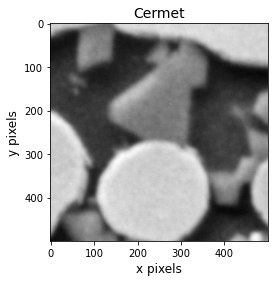

M shape = (500, 500)


In [19]:
'''Generate a larger matrix from an image'''

from matplotlib import pyplot as plt     # import the pyplot function of the matplotlib package
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 4] # extend the figure size on screen output

mtrx = plt.imread('https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cermet.png',format='png')

m_mtrx = mtrx.astype('float64') # make sure data is a double precision float type

plt.figure(1)              # create a figure placeholder
plt.imshow( m_mtrx,cmap='gray')
plt.title('Cermet',fontsize=14)
plt.xlabel('x pixels',fontsize=12)
plt.ylabel('y pixels',fontsize=12)
plt.show()
print('M shape =', m_mtrx.shape)

In [20]:
'''Larger matrix determinant'''

det_m_mtrx = np.linalg.det( m_mtrx )    # determinant

print('max(M) =',m_mtrx.max())
print('min(M) =',m_mtrx.min())

print('det(M) = %10.3e (not an insightful number)'%det_m_mtrx) # formatting numeric output

print('rank(M) = ',np.linalg.matrix_rank( m_mtrx, tol=1e-5 ) )

max(M) = 0.8901960849761963
min(M) = 0.062745101749897
det(M) =  0.000e+00 (not an insightful number)
rank(M) =  500


Let's *solve* for this matrix with $\cvec$ as the right side vector, that is, $\Mmtrx\,\xvec = \cvec$.

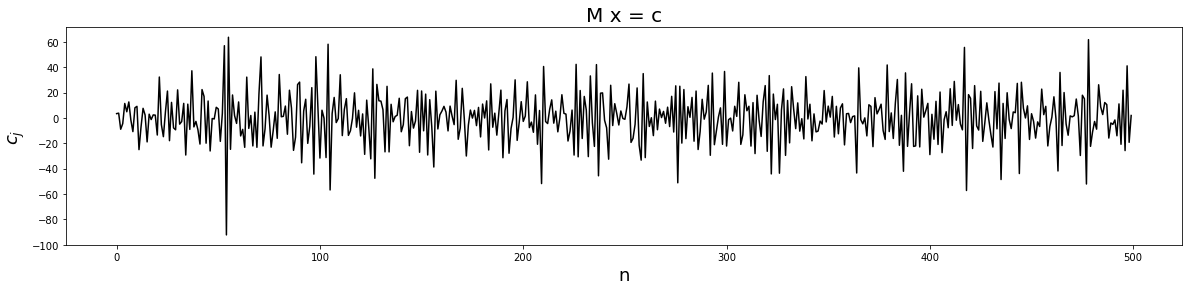

In [21]:
'''Solve M x = c and plot x'''

c_vec = np.random.random(mtrx.shape[0]) # any c will do it

sol = np.linalg.solve( m_mtrx, c_vec ) # solve linear system for A, b

plt.figure(2)
plt.plot(range(c_vec.size),sol,'k')
plt.title('M x = c',fontsize=20)
plt.xlabel('n',fontsize=18)
plt.ylabel('$c_j$',fontsize=18)
print('')

In [22]:
res_vec = c_vec - m_mtrx @ sol
#print('c - M x =',res_vec)
print('||c - M x|| =%12.4e'%np.linalg.norm( res_vec ))

||c - M x|| =  3.3387e-12


### [Matrix inverse](#toc)<a id="pyinv"></a>

The inverse matrix is denoted as $\Amtrx^{-1}$ and is computed as the matrix that multiplies $\bvec$ and produces the solution $\xvec$, that is, $\xvec = \Amtrx^{-1}\,\bvec$.

In [23]:
'''Matrix inverse'''

a_mtrx_inv = np.linalg.inv( a_mtrx ) # matrix inverse; per course notes 17

print('A^-1 =\n', a_mtrx_inv)

A^-1 =
 [[ 0.75  -0.312 -0.375]
 [ 0.5   -0.375 -0.25 ]
 [-1.     1.     1.   ]]


Recall $\Amtrx^{-1}\,\Amtrx = \Imtrx$ where $\Imtrx$ is the identity matrix.

In [24]:
'''Identity matrix'''

i_mtrx = a_mtrx_inv @ a_mtrx  # identity matrix; per course notes 17

print('A^-1 A =\n',i_mtrx)

A^-1 A =
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Using the inverse, the same solution will be found: $\xvec = \Amtrx^{-1}\,\bvec$.

In [25]:
'''Solution using the inverse'''

x_vec_again = a_mtrx_inv @ b_vec  # matrix-vector multiply; per course notes 17

print('solution x =', x_vec_again)

solution x = [1. 1. 2.]


This is the element-by-element reciprocal of the matrix $(\Amtrx)^{-1}$, which is very different than the inverse.

In [26]:
'''Inverse power of a matrix'''

#a_mtrx_to_negative_1 = a_mtrx**(-1) # this will cause an error (division by zero)

'Inverse power of a matrix'

### [$\Pmtrx\,\Lmtrx\,\Umtrx$ factorization](#toc)<a id="pyplu"></a>
The factors: $\Pmtrx$, $\Lmtrx$, and $\Umtrx$ where $\Pmtrx\,\Lmtrx\,\Umtrx = \Amtrx$ can be obtained from the SciPy linear algebra package. $\Pmtrx$ is a permutation matrix if the underlying Gaussian elimination is used to construct the $\Lmtrx$ and $\Umtrx$ factors.

In [27]:
'''Import only the linear algebra package'''

import scipy.linalg
import numpy as np

In [28]:
'''P L U factors of A'''

a_mtrx = np.array( [[1, 2,  3],
                    [4, 5,  6],
                    [7, 8, 10]] )

(p_mtrx, l_mtrx, u_mtrx) = scipy.linalg.lu( a_mtrx )

print('P =\n',p_mtrx)
print('L =\n',l_mtrx)
print('U =\n',u_mtrx)
print('Checking...')
print('PLU - A =\n', p_mtrx @ l_mtrx @ u_mtrx - a_mtrx)

P =
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L =
 [[1.    0.    0.   ]
 [0.143 1.    0.   ]
 [0.571 0.5   1.   ]]
U =
 [[ 7.     8.    10.   ]
 [ 0.     0.857  1.571]
 [ 0.     0.    -0.5  ]]
Checking...
PLU - A =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


The inverse of a permutation matrix is its transpose: $\Pmtrx^{-1} = \Pmtrx^\top$ therefore

\begin{align*}
 \Pmtrx\Lmtrx\Umtrx = \Amtrx
 \\
 \Lmtrx\Umtrx = \Pmtrx^\top\Amtrx
\end{align*}

In [29]:
'''P^-1 = P^T (i.e. the transpose of a permutation matrix is its inverse)'''

pinv_mtrx = np.linalg.inv(p_mtrx)

print('P^-1 =\n', pinv_mtrx)
print('Checking...')
print('P^-1 - P^T =\n', pinv_mtrx - p_mtrx.transpose())

P^-1 =
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Checking...
P^-1 - P^T =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Hence the solution of $\Amtrx\,\xvec = \bvec$ is computed as

\begin{align*}
 \Lmtrx\,\yvec = \Pmtrx^\top\,\bvec
 \\
 \Umtrx\,\xvec = \yvec
\end{align*}

In [30]:
'''PLU x = b; that is: Forward: L y = P^-1 b, Backward: U x = y '''

b_vec = np.array([1.,2.,3.])
y_vec = scipy.linalg.solve(l_mtrx, p_mtrx.transpose() @ b_vec) # L y = P^T b

x_vec = scipy.linalg.solve(u_mtrx, y_vec)                      # U x = y

print('x =', x_vec)

x_vec_gold = scipy.linalg.solve( a_mtrx, b_vec )    # solution using A x = b

print('||x - x_gold|| =',scipy.linalg.norm(x_vec-x_vec_gold))

x = [-3.333e-01  6.667e-01  3.172e-17]
||x - x_gold|| = 0.0


In [31]:
'''Deterninant of U or L: product of the diagonal'''

det_u = np.linalg.det(u_mtrx)

print('det(U) = %8.3e'%det_u)

diag_vec = np.diagonal(u_mtrx)
prod = np.prod(diag_vec)

print('diag(U) product = %8.3e'%prod )

det(U) = -3.000e+00
diag(U) product = -3.000e+00


In [32]:
'''Determinant of P (always +1 or -1)'''

det_p = np.linalg.det(p_mtrx)

print('det(P) = %8.3e'%det_p)

det(P) = 1.000e+00


In [33]:
'''Determinant of A = det(PLU)'''

det_l = np.prod( np.diagonal(l_mtrx) )
det_plu = det_p * det_l * det_u # last term is det of L

print('det(PLU) = %8.3e'%det_plu)
print('det(A)   = %8.3e'%np.linalg.det(a_mtrx))

det(PLU) = -3.000e+00
det(A)   = -3.000e+00


### [$\Lmtrx$ forward solve](#toc)<a id="pyl"></a>
A lower triangular matrix like any matrix can be used in a matrix solve.

In [34]:
'''L forward solve'''

l_mtrx = np.array( [[1., 0., 0.],   # per course notes 
                    [2., 3., 0.],
                    [4., 5., 6.]] )

b_vec = np.array( [1.,2.,3.] )

x_vec = np.linalg.solve( l_mtrx, b_vec )

np.set_printoptions(precision=3) # one way to control printing of numpy arrays

print('x = ',x_vec)

x =  [ 1.000e+00 -1.110e-17 -1.667e-01]


### [$\Umtrx$ backward solve](#toc)<a id="pyu"></a>
An upper triangular matrix like any matrix can be used in a matrix solve.

In [35]:
'''U backward solve'''

u_mtrx = np.array( [[1., 2., 3.],   # per course notes
                    [0, 4., 5.],
                    [0., 0., 6.]] )

b_vec = np.array( [1.,2.,3.] )

x_vec = np.linalg.solve( u_mtrx, b_vec )

np.set_printoptions(precision=3) # one way to control printing of numpy arrays
print('x = ',x_vec)

x =  [-0.25  -0.125  0.5  ]


## [ChEn-3170 Linear Algebra](#toc)<a id="courselinalg"></a>
In this course various algorithms need to be programmed. These should be compared to `SciPy` and/or `NumPy`.

In [36]:
'''Import the NumPy package as usual'''

import numpy as np

### [$\Lmtrx$ forward solve](#toc)<a id="l"></a>
A lower triangular matrix allows for a forward solve.
The algorithm for $\Lmtrx\,\xvec=\bvec$ is as follows: 

\begin{equation*}
x_i = \Bigl(b_i - \sum\limits_{j=1}^{i-1} L_{i,j}\,x_j \Bigr)\,L^{-1}_{i,i} \quad\ \forall \quad\ i=1,\ldots,m
\end{equation*}

**for $i$ and $j$ with offset 1**. See Python implementation below.

In [37]:
'''L forward solve'''

l_mtrx = np.array( [[1., 0., 0.],   # per course notes 
                    [2., 3., 0.],
                    [4., 5., 6.]] )

b_vec = np.array( [1.,2.,3.] )

In [38]:
'''Import the L forward solver'''

from chen_3170.help import forward_solve # using the forward solve from this course's help package

In [39]:
help(forward_solve)

Help on function forward_solve in module chen_3170.help:

forward_solve(l_mtrx, b_vec, loop_option='use-dot-product')
    Performs a forward solve with a lower triangular matrix and right side vector.
    
    Parameters
    ----------
    l_mtrx: numpy.ndarray, required
            Lower triangular matrix.
    b_vec:  numpy.ndarray, required
            Right-side vector.
    loop_option: string, optional
            This is an internal option to demonstrate the usage of an explicit
            double loop or an implicit loop using a dot product.
            Default: 'use-dot-product'
    
    Returns
    -------
    x_vec: numpy.narray
           Solution vector returned.
    
    Examples
    --------



In [40]:
'''Usage example'''

x_vec = forward_solve( l_mtrx, b_vec )

np.set_printoptions(precision=3) # one way to control printing of numpy arrays
print('x = ',x_vec)

x =  [ 1.     0.    -0.167]


In [41]:
'''View the source code in the notebook'''

#!cat "chen_3170/help.py" # ugly but works for now (uncomment to show)

'View the source code in the notebook'

```python
def forward_solve(l_mtrx, b_vec, loop_option='use-dot-product'):
    """Performs a forward solve with a lower triangular matrix and right side vector.

    Parameters
    ----------
    l_mtrx: numpy.ndarray, required
            Lower triangular matrix.
    b_vec:  numpy.ndarray, required
            Right-side vector.
    loop_option: string, optional
            This is an internal option to demonstrate the usage of an explicit
            double loop or an implicit loop using a dot product.
            Default: 'use-dot-product'

    Returns
    -------
    x_vec: numpy.narray
           Solution vector returned.

    Examples
    --------

    """
    import numpy as np

    # sanity tests

    # l_mtrx must be np.ndarray
    assert isinstance(l_mtrx, np.ndarray)

    # l_mtrx must be square
    assert l_mtrx.shape[0] == l_mtrx.shape[1], 'non-square matrix.'

    assert np.all(np.abs(np.diagonal(l_mtrx)) > 0.0), 'zero value on diagonal.'

    # get i, j of all non zero entries
    rows_ids, cols_ids = np.where(np.abs(l_mtrx) > 0)

    # non-zero number must be in the lower triangular portion
    assert np.all(rows_ids >= cols_ids), 'non-triangular matrix.' # test i >= j

    # b_vec must be compatible to l_mtrx
    assert b_vec.shape[0] == l_mtrx.shape[0], 'incompatible l_mtrx @ b_vec dimensions'

    assert loop_option in ('use-dot-product', 'use-double-loop')
    # end of sanity test

    m_rows = l_mtrx.shape[0]
    n_cols = m_rows
    x_vec = np.zeros(n_cols)

    if loop_option == 'use-dot-product':

        for i in range(m_rows):
            sum_lx = np.dot(l_mtrx[i, :i], x_vec[:i])
            #sum_lx = l_mtrx[i,:i] @ x_vec[:i] # matrix-vec mult. alternative to dot product
            x_vec[i] = (b_vec[i] - sum_lx) / l_mtrx[i, i]

    elif loop_option == 'use-double-loop':

        for i in range(m_rows):
            sum_lx = 0.0
            for j in range(i):
                sum_lx += l_mtrx[i, j] * x_vec[j]
            x_vec[i] = (b_vec[i] - sum_lx) / l_mtrx[i, i]

    else:
        assert False, 'not allowed option: %r'%loop_option

    return x_vec
```

A lower triangular matrix allows for a forward solve.
The algorithm for $\Lmtrx\,\xvec=\bvec$ is as follows: 

\begin{equation*}
x_i = \Bigl(b_i - \sum\limits_{j=1}^{i-1} L_{i,j}\,x_j \Bigr)\,L^{-1}_{i,i} \quad\ \forall \quad\ i=1,\ldots,m
\end{equation*}

**for $i$ and $j$ with offset 1**. Recall that `NumPy` and `Python` have offset 0 for their sequence data types.

### [$\Umtrx$ backward solve](#toc)<a id="u"></a>
A upper triangular matrix allows for a backward solve.
The algorithm for $\Umtrx\,\xvec=\bvec$ is as follows: 

\begin{equation*} x_i = \Bigl(b_i - \sum\limits_{j=i+1}^{m} U_{i,j}\,x_j \Bigr)\,U^{-1}_{i,i} \quad\ \forall \quad\ i=m,\ldots,1
\end{equation*}

**for $i$ and $j$ with offset 1**. Recall that `NumPy` and `Python` have offset 0 for their sequence data types.

In [42]:
'''U backward solve'''

u_mtrx = np.array( [[1., 2., 3.],   # per course notes
                    [0 , 4., 5.],
                    [0., 0., 6.]] )

b_vec = np.array( [1.,2.,3.] )

try:    
    from chen_3170.toolkit import backward_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own backward_solve function here. Bailing out.'

x_vec = backward_solve( u_mtrx, b_vec )

np.set_printoptions(precision=3) # one way to control printing of numpy arrays
print('x = ',x_vec)

x =  [-0.25  -0.125  0.5  ]


### [Verification of solver accuracy](#toc)<a id="accuracy"></a>

TODO

In [43]:
from chen_3170.help import get_triangular_matrix

u_mtrx = get_triangular_matrix('upper',550)

for i in range(550):
    u_mtrx[i,i] = 1.0
    
b_vec = np.ones(550)

np.set_printoptions(precision=3, threshold=1000, edgeitems=5, linewidth=100)

print(u_mtrx)
print(u_mtrx.dtype)
print('rank =',np.linalg.matrix_rank(u_mtrx))

x_vec = backward_solve(u_mtrx, b_vec)
print('||b-Ux|| =',np.linalg.norm(b_vec-u_mtrx@x_vec))

z_vec = np.linalg.solve(u_mtrx,b_vec)
print('||b-Uz|| =',np.linalg.norm(b_vec-u_mtrx@z_vec))

#z_vec - u_mtrx @ b_vec
print('||x - z||=',np.linalg.norm(x_vec-z_vec))

[[1.    0.016 0.815 0.563 0.458 ... 0.179 0.465 0.796 0.064 0.697]
 [0.    1.    0.899 0.627 0.421 ... 0.058 0.827 0.81  0.073 0.85 ]
 [0.    0.    1.    0.733 0.9   ... 0.519 0.729 0.995 0.245 0.409]
 [0.    0.    0.    1.    0.658 ... 0.774 0.219 0.239 0.079 0.067]
 [0.    0.    0.    0.    1.    ... 0.776 0.389 0.727 0.803 0.677]
 ...
 [0.    0.    0.    0.    0.    ... 1.    0.629 0.994 0.528 0.755]
 [0.    0.    0.    0.    0.    ... 0.    1.    0.418 0.726 0.433]
 [0.    0.    0.    0.    0.    ... 0.    0.    1.    0.523 0.998]
 [0.    0.    0.    0.    0.    ... 0.    0.    0.    1.    0.417]
 [0.    0.    0.    0.    0.    ... 0.    0.    0.    0.    1.   ]]
float64
rank = 548
||b-Ux|| = 0.00011302154951212123
||b-Uz|| = 9.6866566841077e-05
||x - z||= 0.0007266561485290931


### [$\Amtrx = \Lmtrx\,\Umtrx$ factorization](#toc)<a id="lu"></a>
$\Lmtrx\,\Umtrx$ factorization algorithm (without using pivoting) for a square matrix $\overset{(m \times m)}{\Amtrx}$ computes the $\Lmtrx\,\Umtrx$ factors. The factorization is obtained by elimination steps $k = 1,\ldots,m-1$ so that 

\begin{equation*}
 A^{(k+1)}_{i,j} = A^{(k)}_{i,j} - A^{(k)}_{k,j}\, m_{i,k} \quad\ \forall\ i=k+1,\ldots,m \quad\ \text{and} \quad\ j=k,\ldots,m
\end{equation*}

where the multipliers $m_{i,k}$ are given by $m_{i,k} = \frac{A^{(k)}_{i,k}}{A^{(k)}_{k,k}}$. When $k = m-1$, $A^{(m)}_{i,j}$, is upper triangular, that is, $U_{i,j} = A^{(m)}_{i,j}$ . The lower triangular matrix is obtained using the multipliers $m_{i,k}$, that is $L_{i,j} = m_{i,j} \ \forall \ i>j$,  $L_{i,i}=1$, and $L_{i,j}=0 \ \forall \ i<j$.

In [44]:
'''L U factors of A'''

import numpy as np

a_mtrx = np.array( [[1., 2.,  3.],
                    [4., 5.,  6.],
                    [7., 8., 10.]] )

try:    
    from chen_3170.toolkit import lu_factorization   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

(l_mtrx, u_mtrx, _) = lu_factorization( a_mtrx )

np.set_printoptions(precision=5, threshold=20, edgeitems=12, linewidth=100)

print('L =\n',l_mtrx)
print('U =\n',u_mtrx)
print('')
print('Checking...')
print('LU - A =\n', l_mtrx @ u_mtrx - a_mtrx)

L =
 [[1. 0. 0.]
 [4. 1. 0.]
 [7. 2. 1.]]
U =
 [[ 1.  2.  3.]
 [ 0. -3. -6.]
 [ 0.  0.  1.]]

Checking...
LU - A =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### [$\Pmtrx\,\Amtrx = \Lmtrx\,\Umtrx$ factorization](#toc)<a id="plu"></a>
The factors: $\Pmtrx$, $\Lmtrx$, and $\Umtrx$ where $\Lmtrx\,\Umtrx = \Pmtrx\,\Amtrx$ can be obtained from **partial pivoting** strategy to the $\Lmtrx\,\Umtrx$ factorization algorithm shown above. $\Pmtrx$ is a row permutation matrix obtained by the underlying Gaussian elimination used to construct the $\Lmtrx$ and $\Umtrx$ factors.

Program a $\Lmtrx\,\Umtrx$ factorization algorithm (using partial pivoting) for a square matrix $\overset{(m \times m)}{\Amtrx}$ and compute the $\Pmtrx\,\Lmtrx\,\Umtrx$ factors. 

The factorization is obtained by elimination steps $k = 1,\ldots,m-1$ so that 

\begin{equation*}
A^{(k+1)}_{i,j} = A^{(k)}_{i,j} - A^{(k)}_{k,j}\, m_{i,k} \ \forall\ i=k+1,\ldots,m \ \text{and}\ j=k,\ldots,m 
\end{equation*}

where the multipliers $m_{i,k}$ are given by $m_{i,k} = \frac{A^{(k)}_{i,k}}{A^{(k)}_{k,k}}$. When $k = m-1$, $A^{(m)}_{i,j}$, is upper triangular, that is, $U_{i,j} = A^{(m)}_{i,j}$ . The lower triangular matrix is obtained using the multipliers $m_{i,k}$, that is $L_{i,j} = m_{i,j} \ \forall \ i>j$,  $L_{i,i}=1$, and $L_{i,j}=0 \ \forall \ i<j$. However, every $k$-step selects a pivot $A^{(k)}_{k,k}$ of maximum absolute value via row exchanges recorded in the permutation matrix $\Pmtrx$.

In [45]:
'''P L U factors of A'''

import numpy as np
a_mtrx = np.array( [[1., 2.,  3.],
                    [4., 5.,  6.],
                    [7., 8., 10.]] )

try:    
    from chen_3170.toolkit import lu_factorization   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

(l_mtrx, u_mtrx, p_mtrx, _) = lu_factorization( a_mtrx, pivoting_option='partial' )

np.set_printoptions(precision=5, threshold=20, edgeitems=12, linewidth=100)

print('L =\n',l_mtrx)
print('U =\n',u_mtrx)
print('P =\n',p_mtrx)

print('')
print('Checking...')
print('LU - PA =\n', l_mtrx @ u_mtrx - p_mtrx @ a_mtrx)

L =
 [[1.      0.      0.     ]
 [0.14286 1.      0.     ]
 [0.57143 0.5     1.     ]]
U =
 [[ 7.00000e+00  8.00000e+00  1.00000e+01]
 [ 0.00000e+00  8.57143e-01  1.57143e+00]
 [ 0.00000e+00  5.55112e-17 -5.00000e-01]]
P =
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

Checking...
LU - PA =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### [$\Pmtrx\,\Amtrx\,\Qmtrx = \Lmtrx\,\Umtrx$ factorization](#toc)<a id="pqlu"></a>
The factors: $\Pmtrx$, $\Qmtrx$, $\Lmtrx$, and $\Umtrx$ where $\Lmtrx\,\Umtrx = \Pmtrx\,\Amtrx\,\Qmtrx$ can be obtained from a user-developed algorithm with **complete pivoting**. $\Pmtrx$ is a row permutation matrix and $\Qmtrx$ is a column permutation matrix, obtained by the underlying Gaussian elimination used to construct the $\Lmtrx$ and $\Umtrx$ factors.

Program a $\Lmtrx\,\Umtrx$ factorization algorithm (using complete pivoting) for a square matrix $\overset{(m \times m)}{\Amtrx}$ and compute the $\Pmtrx\,,\Qmtrx\,,\Lmtrx\,,\Umtrx$ factors. The factorization is obtained by elimination steps $k = 1,\ldots,m-1$ so that 

\begin{equation*}
A^{(k+1)}_{i,j} = A^{(k)}_{i,j} - A^{(k)}_{k,j}\, m_{i,k} \ \forall\ i=k+1,\ldots,m \ \text{and}\ j=k,\ldots,m 
\end{equation*}

where the multipliers $m_{i,k}$ are given by $m_{i,k} = \frac{A^{(k)}_{i,k}}{A^{(k)}_{k,k}}$. When $k = m-1$, $A^{(m)}_{i,j}$, is upper triangular, that is, $U_{i,j} = A^{(m)}_{i,j}$ . The lower triangular matrix is obtained using the multipliers $m_{i,k}$, that is $L_{i,j} = m_{i,j} \ \forall \ i>j$,  $L_{i,i}=1$, and $L_{i,j}=0 \ \forall \ i<j$. However, every $k$-step selects a pivot $A^{(k)}_{k,k}$ of maximum absolute value via row
exchanges recorded in the permutation matrix $\Pmtrx$ and column exchanges recorded in the permutation matrix $\Qmtrx$.

In [46]:
'''P Q L U factors of A'''

a_mtrx = np.array( [[1., 2.,  3.],
                    [4., 5.,  6.],
                    [7., 8., 10.]] )

try:    
    from chen_3170.toolkit import lu_factorization   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

(l_mtrx, u_mtrx, p_mtrx, q_mtrx, _) = lu_factorization( a_mtrx, pivoting_option='complete' )

np.set_printoptions(precision=5, threshold=20, edgeitems=12, linewidth=100)

print('L =\n',l_mtrx)
print('U =\n',u_mtrx)
print('P =\n',p_mtrx)
print('Q =\n',q_mtrx)

print('')
print('Checking...')
print('LU - PAQ =\n', l_mtrx @ u_mtrx - p_mtrx @ a_mtrx @ q_mtrx)

L =
 [[1.      0.      0.     ]
 [0.3     1.      0.     ]
 [0.6     0.18182 1.     ]]
U =
 [[10.       7.       8.     ]
 [ 0.      -1.1     -0.4    ]
 [ 0.       0.       0.27273]]
P =
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Q =
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

Checking...
LU - PAQ =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### [Rank of $\Amtrx$](#toc)<a id="rank"></a>
Use the $\Lmtrx\Umtrx$ factorization of $\Amtrx$ with complete pivoting to obtain the rank of $\Amtrx$.

In [47]:
'''Rank of A'''

import numpy as np

a_mtrx = np.array( [[1., 2.,  3.],
                    [4., 5.,  6.],
                    [7., 8., 10.]] )

try:    
    from chen_3170.toolkit import lu_factorization   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

(l_mtrx, u_mtrx, p_mtrx, q_mtrx, rank) = lu_factorization( a_mtrx, pivoting_option='complete' )

np.set_printoptions(precision=5, threshold=20, edgeitems=12, linewidth=100)

print('L =\n',l_mtrx)
print('U =\n',u_mtrx)
print('P =\n',p_mtrx)
print('Q =\n',q_mtrx)

print('')
print('Checking...')
print('LU - PAQ =\n', l_mtrx @ u_mtrx - p_mtrx @ a_mtrx @ q_mtrx)
print('')
print('rank(A) = ',rank)
print('A shape =', a_mtrx.shape)

L =
 [[1.      0.      0.     ]
 [0.3     1.      0.     ]
 [0.6     0.18182 1.     ]]
U =
 [[10.       7.       8.     ]
 [ 0.      -1.1     -0.4    ]
 [ 0.       0.       0.27273]]
P =
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
Q =
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

Checking...
LU - PAQ =
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

rank(A) =  3
A shape = (3, 3)


In [48]:
a_mtrx = np.random.random((5,7))

(l_mtrx, u_mtrx, p_mtrx, q_mtrx, rank) = lu_factorization( a_mtrx, pivoting_option='complete' )

np.set_printoptions(precision=3, threshold=20, edgeitems=12, linewidth=100)

print('L =\n',l_mtrx)
print('U =\n',u_mtrx)
print('P =\n',p_mtrx)
print('Q =\n',q_mtrx)

print('')
print('Checking...')
print('max(abs(LU - PAQ)) =', np.max(np.abs(l_mtrx @ u_mtrx - p_mtrx @ a_mtrx @ q_mtrx)))
print('')
print('rank(A) = ',rank)
print('A shape =', a_mtrx.shape)

L =
 [[ 1.     0.     0.     0.     0.   ]
 [ 0.245  1.     0.     0.     0.   ]
 [ 0.046  0.074  1.     0.     0.   ]
 [ 0.024  0.296  0.002  1.     0.   ]
 [ 0.357  0.027 -0.086 -0.217  1.   ]]
U =
 [[ 0.981  0.189  0.485  0.782  0.682  0.941  0.301]
 [ 0.     0.902  0.169  0.171  0.729 -0.014  0.881]
 [ 0.     0.     0.832  0.448  0.354  0.458  0.311]
 [ 0.     0.     0.     0.66   0.225  0.056  0.055]
 [ 0.     0.     0.     0.     0.609  0.235  0.578]]
P =
 [[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
Q =
 [[0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]

Checking...
max(abs(LU - PAQ)) = 2.220446049250313e-16

rank(A) =  5
A shape = (5, 7)


In [49]:
'''Class notes example: CH4 combustion'''

s_mtrx = np.array([ [ 1, 0,-1, 0, 2,-1],
                    [ 0, 2, 0, 0,-2,-1],
                    [ 0, 0, 2,-2,-4, 1]
                  ])

(l_mtrx, u_mtrx, p_mtrx, q_mtrx, rank) = lu_factorization( s_mtrx.transpose(), pivoting_option='complete' )

np.set_printoptions(precision=3, threshold=20, edgeitems=12, linewidth=100)

print('L =\n',l_mtrx)
print('U =\n',u_mtrx)
print('P =\n',p_mtrx)
print('Q =\n',q_mtrx)

print('')
print('Checking...')
print('max(abs(LU - PSTQ)) =', np.max(np.abs(l_mtrx @ u_mtrx - p_mtrx @ s_mtrx.transpose() @ q_mtrx)))
print('')
print('rank(ST) = ',rank)
print('ST shape =', s_mtrx.transpose().shape)

L =
 [[ 1.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.  ]
 [ 0.5   0.5   1.    0.    0.    0.  ]
 [-0.5  -0.5   0.    1.    0.    0.  ]
 [ 0.    0.   -1.    0.    1.    0.  ]
 [-0.25 -0.75  0.5   0.    0.    1.  ]]
U =
 [[-4. -2.  2.]
 [ 0.  2.  0.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
P =
 [[0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
Q =
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

Checking...
max(abs(LU - PSTQ)) = 0.0

rank(ST) =  3
ST shape = (6, 3)


In [50]:
'''Class notes example: arbitrary reaction mechanism'''

s_mtrx = np.array([ [-1,-1, 1, 1, 0, 0],
                    [-1, 0, 0, 1,-1, 1],
                    [ 0,-1, 1, 0, 1,-1],
                  ])

(l_mtrx, u_mtrx, p_mtrx, q_mtrx, rank) = lu_factorization( s_mtrx.transpose(), pivoting_option='complete' )

np.set_printoptions(precision=3, threshold=20, edgeitems=12, linewidth=100)

print('L =\n',l_mtrx)
print('U =\n',u_mtrx)
print('P =\n',p_mtrx)
print('Q =\n',q_mtrx)

print('')
print('Checking...')
print('max(abs(LU - PSTQ)) =', np.max(np.abs(l_mtrx @ u_mtrx - p_mtrx @ s_mtrx.transpose() @ q_mtrx)))
print('')
print('rank(ST) = ',rank)
print('ST shape =', s_mtrx.transpose().shape)

L =
 [[ 1.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.]
 [-1. -1.  1.  0.  0.  0.]
 [-1.  0.  0.  1.  0.  0.]
 [ 0. -1.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  1.]]
U =
 [[-1. -1.  0.]
 [ 0.  1. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
P =
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
Q =
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Checking...
max(abs(LU - PSTQ)) = 0.0

rank(ST) =  2
ST shape = (6, 3)
